In [1]:
import os
import pandas as pd
import numpy as np
import plotnine
from datetime import date
import scipy
import seaborn as sns
from Bio import SeqIO
import matplotlib.pyplot as plt
from upsetplot import from_memberships

In [2]:
output_dir="/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett"
salmon_dir="/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett/intermediate-files/04-compare/xx-individual-mapping/salmon"

In [17]:
EUKulele_frame = pd.DataFrame()
EUKulele_frame_full = pd.DataFrame()

for curr_folder in os.listdir(os.path.join(output_dir,'EUKulele_assemblers')):
    curr_assembler = curr_folder.split("EUKulele_")[-1]
    for curr_file in os.listdir(os.path.join(output_dir,'EUKulele_assemblers',curr_folder,"taxonomy_estimation")):
        curr_sample = curr_file.split("_" + curr_assembler)[0]
        EUKulele_file = pd.read_csv(os.path.join(output_dir,'EUKulele_assemblers',curr_folder,
                                                 "taxonomy_estimation",curr_file),sep="\t")
        EUKulele_file["split_tscpt_name"] = [curr.split(curr_sample + "_")[-1] for curr in \
                                             EUKulele_file["transcript_name"]]
        salmon_file = pd.read_csv(os.path.join(salmon_dir,curr_sample+"_"+curr_assembler+"_quant",
                                               "quant.sf"),sep="\t")
        EUKulele_file = pd.merge(EUKulele_file,salmon_file,left_on="split_tscpt_name",right_on="Name",
                                 how = "right")
        EUKulele_file.loc[EUKulele_file.full_classification != EUKulele_file.full_classification,
                          "full_classification"] = "Unclassified;Unclassified;Unclassified;" + \
                    "Unclassified;Unclassified;Unclassified;Unclassified;Unclassified"
        class_labels = ["Domain","Supergroup","Phylum","Class","Order",
                    "Family","Genus","Species"]
        EUKulele_file[class_labels]= EUKulele_file["full_classification"].\
                                            str.split(";", n = 8, expand = True)
        for class_label in class_labels:
            EUKulele_file.loc[[curr is None for curr in EUKulele_file[class_label]],class_label] = "Unknown"
        EUKulele_file_full = EUKulele_file.copy(deep=True)
        EUKulele_file_full["Sample"] = curr_sample
        EUKulele_file_full["Assembler"] = curr_assembler
        EUKulele_file = EUKulele_file.groupby(["Order","Domain",
                                               "Phylum","Class","Family","Genus"]).agg({'TPM': ['count',
                                                                               'sum']}).reset_index()
        EUKulele_file.columns = ["".join(col) for col in EUKulele_file.columns.values]
        EUKulele_file["Sample"] = curr_sample
        EUKulele_file["Assembler"] = curr_assembler
        EUKulele_frame = pd.concat([EUKulele_frame,EUKulele_file])
        EUKulele_frame_full = pd.concat([EUKulele_frame_full,EUKulele_file_full])

In [9]:
salmon_frame = pd.DataFrame()
for curr_folder in os.listdir(os.path.join(output_dir,'EUKulele_assemblers')):
    curr_assembler = curr_folder.split("EUKulele_")[-1]
    for curr_file in os.listdir(os.path.join(output_dir,'EUKulele_assemblers',curr_folder,"taxonomy_estimation")):
        curr_sample = curr_file.split("_" + curr_assembler)[0]
        salmon_file = pd.read_csv(os.path.join(salmon_dir,curr_sample+"_"+curr_assembler+"_quant",
                                               "quant.sf"),sep="\t")
        salmon_file["Sample"] = curr_sample
        salmon_file["Assembler"] = curr_assembler
        salmon_frame = pd.concat([salmon_frame,salmon_file])

In [19]:
EUKulele_frame_full.columns
(plotnine.ggplot(EUKulele_frame_full.groupby(["Sample","Assembler"]).Length.mean().reset_index()) + 
    plotnine.geom_bar(plotnine.aes(x = "Assembler",y = "Length"),stat="identity") + 
    plotnine.facets.facet_wrap("Sample")+ plotnine.theme_bw(base_size=16) +
    plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)) )

Index(['Unnamed: 0', 'transcript_name', 'classification_level',
       'full_classification', 'classification', 'max_pid', 'ambiguous',
       'counts', 'split_tscpt_name', 'Name', 'Length', 'EffectiveLength',
       'TPM', 'NumReads', 'Domain', 'Supergroup', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'Sample', 'Assembler'],
      dtype='object')

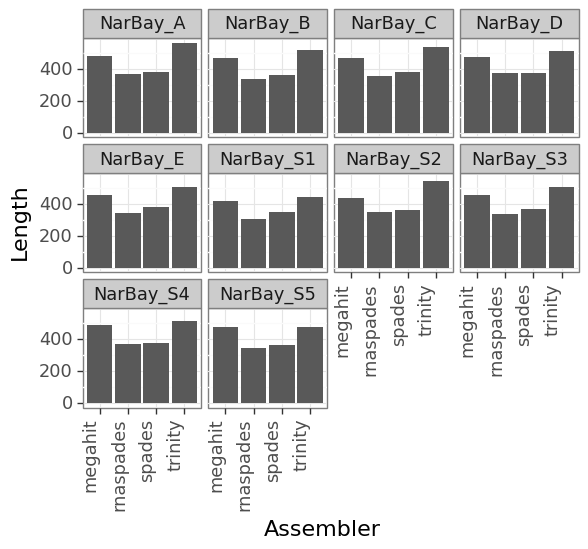

<ggplot: (2932504481100)>

In [15]:
(plotnine.ggplot(salmon_frame.groupby(["Sample","Assembler"]).Length.mean().reset_index()) + 
    plotnine.geom_bar(plotnine.aes(x = "Assembler",y = "Length"),stat="identity") + 
    plotnine.facets.facet_wrap("Sample")+ plotnine.theme_bw(base_size=16) +
    plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)) )

In [30]:
curr_sample = curr_file.split("_" + curr_assembler)[0]
EUKulele_file = pd.read_csv(os.path.join(output_dir,'EUKulele_assemblers',curr_folder,
                                         "taxonomy_estimation",curr_file),sep="\t")
EUKulele_file["split_tscpt_name"] = [curr.split(curr_sample + "_")[-1] for curr in \
                                     EUKulele_file["transcript_name"]]
salmon_file = pd.read_csv(os.path.join(salmon_dir,curr_sample+"_"+curr_assembler+"_quant",
                                       "quant.sf"),sep="\t")
EUKulele_file = pd.merge(EUKulele_file,salmon_file,left_on="split_tscpt_name",right_on="Name",
                         how = "right")
EUKulele_file.loc[EUKulele_file.full_classification != EUKulele_file.full_classification,
                  "full_classification"] = "Unclassified;Unclassified;Unclassified;" + \
            "Unclassified;Unclassified;Unclassified;Unclassified;Unclassified"

EUKulele_file[["Domain","Supergroup","Phylum","Class","Order",
            "Family","Genus","Species"]]= EUKulele_file["full_classification"].\
                                    str.split(";", n = 8, expand = True)
EUKulele_file[EUKulele_file.Phylum == "Unclassified"].head()

,Order,Domain,Phylum,Class,Family,Genus,TPMcount,TPMsum,Sample,Assembler
283,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,243221,215341.662859,NarBay_S2,megahit
273,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,188703,281204.060423,NarBay_A,megahit
278,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,195680,304456.760682,NarBay_E,megahit
259,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,161560,339818.825002,NarBay_S4,megahit
322,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,Unclassified,362023,268629.009541,NarBay_S3,megahit


In [36]:
print(list(salmon_file.loc[:,"Name"])[0])
list(EUKulele_file.loc[EUKulele_file.Phylum == "Unclassified","split_tscpt_name"])[0]

NODE_1_length_15248_cov_34.994800


'NODE_22552_length_1525_cov_2.997279'

In [6]:
EUKulele_frame.to_csv(os.path.join("..","data-output","eukulele_frame_full_2Feb.csv"))

In [ ]:
EUKulele_frame_full.columns

In [20]:
EUKulele_frame_full.to_csv(os.path.join("..","data-output","eukulele_frame_w_lengths_2Feb.csv"))

In [46]:

EUKulele_file = pd.read_csv(os.path.join(output_dir,'EUKulele_assemblers',curr_folder,
                                         "taxonomy_estimation",curr_file),sep="\t")

In [40]:
EUKulele_file["transcript_name"][0]

'spades_NarBay_S2_NODE_10000_length_2053_cov_3.679179'

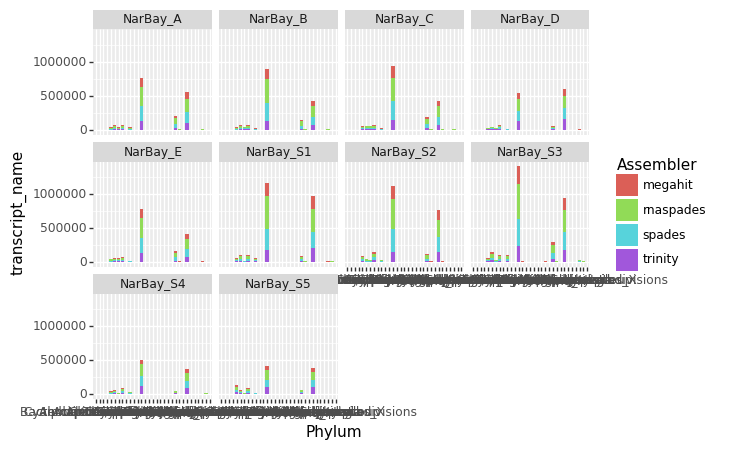

<ggplot: (2932293532706)>

In [29]:
(plotnine.ggplot(EUKulele_frame[EUKulele_frame.transcript_name > 100]) + 
    plotnine.geom_bar(plotnine.aes(x = "Phylum", y = "transcript_name",
                                   fill = "Assembler",group="Assembler"), stat="identity") + 
    plotnine.facet_wrap("Sample"))

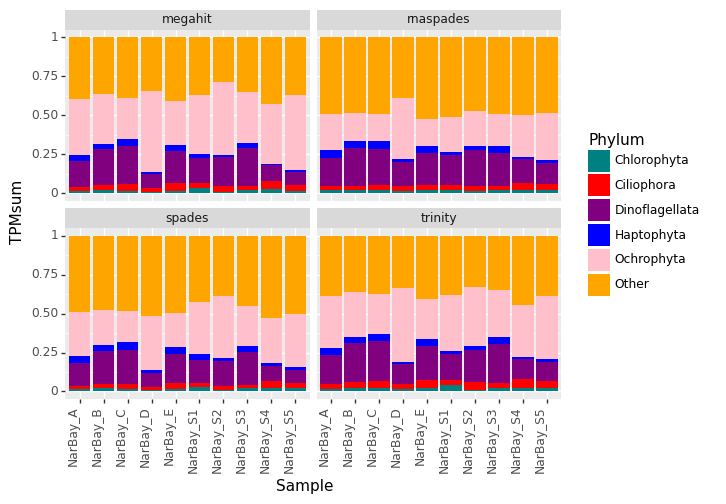

<ggplot: (2932391884755)>

In [7]:
EUKulele_frame_check = EUKulele_frame.copy(deep=True)
EUKulele_frame_check["Phylum"] = [curr.strip() for curr in EUKulele_frame_check["Phylum"]]
EUKulele_frame_check.loc[[curr.strip() not in ["Haptophyta","Ochrophyta",
                                     "Ciliophora","Chlorophyta",
                                     "Dinoflagellata"] for curr in EUKulele_frame_check.Phylum],
                   "Phylum"] = "Other"
EUKulele_frame_check.to_csv(os.path.join("..","data-output","EUKulele_frame_check.csv"))

(plotnine.ggplot(EUKulele_frame_check.\
                 groupby(["Phylum","Assembler","Sample"])["TPMsum"].sum().reset_index()) + 
    plotnine.geom_bar(plotnine.aes(x = "Sample", y = "TPMsum",
                                   fill = "Phylum",group="Assembler"), stat="identity", position="fill") + 
    plotnine.scale_fill_manual(values = ["teal","red","purple","blue","pink","orange","black"], name = "")+ 
    plotnine.facet_wrap("Assembler")+ 
    plotnine.theme(axis_text_x=plotnine.element_text(rotation=90, hjust=1)))

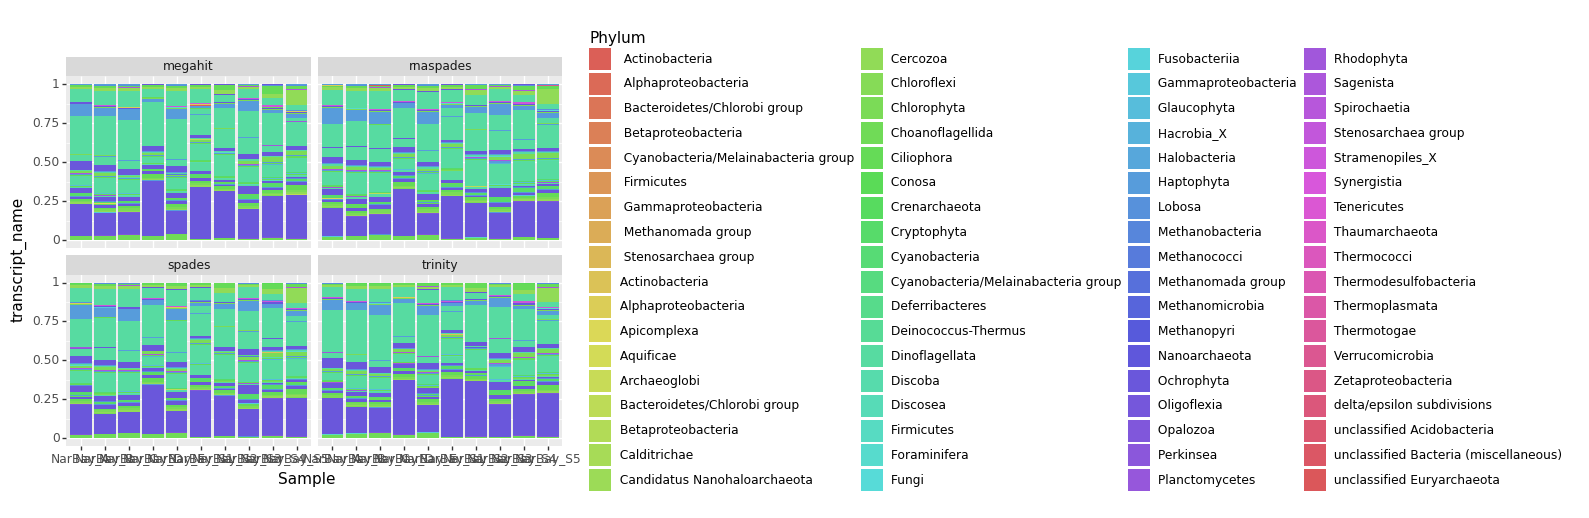

<ggplot: (2932276267786)>

In [30]:
(plotnine.ggplot(EUKulele_frame) + 
    plotnine.geom_bar(plotnine.aes(x = "Sample", y = "transcript_name",
                                   fill = "Phylum",group="Assembler"), stat="identity", position="fill") + 
    plotnine.facet_wrap("Assembler"))

In [ ]:
for curr_file in os.listdir(os.path.join(output_dir,'EUKulele_merged_CAG',curr_folder,"taxonomy_estimation")):
    curr_sample = curr_file.split("_" + curr_assembler)[0]
    EUKulele_file = pd.read_csv(os.path.join(output_dir,'EUKulele_assemblers',curr_folder,
                                             "taxonomy_estimation",curr_file),sep="\t")
    EUKulele_file[["Domain","Supergroup","Phylum","Class","Order",
                "Family","Genus","Species"]]= EUKulele_file["full_classification"].\
                                        str.split(";", n = 8, expand = True)
    EUKulele_file = EUKulele_file.groupby("Order")["transcript_name"].reset_index()
    EUKulele_file["Sample"] = curr_sample
    EUKulele_file["Assembler"] = curr_assembler

## Process functional data from eggNOG-mapper

In [24]:
eggnog_all = pd.DataFrame()
for assembler in os.listdir(os.path.join(output_dir,'eggnog_AGM')):
    if "annotations" not in assembler:
        continue
    sample = assembler.split(".")[0] #unlist(strsplit(assembler,"\\."))[1]
    eggnog_assembler = pd.read_csv(os.path.join(output_dir, "eggnog_AGM", 
                                   assembler),
                                   sep="\t",comment="#",
                        header=None,names=["query","seed_ortholog","evalue","score",
                                           "eggNOG_OGs","max_annot_lvl","COG_category",
                                           "Description","Preferred_name","GOs","EC","KEGG_ko",
                                           "KEGG_Pathway","KEGG_Module","KEGG_Reaction","KEGG_rclass",
                                           "BRITE","KEGG_TC","CAZy","BiGG_Reaction","PFAMs"])

    eggnog_assembler["Source"] = sample
    eggnog_all = pd.concat([eggnog_all,eggnog_assembler])

In [25]:
eggnog_all["AssemblerSource"] = [curr.split("_")[0] for curr in eggnog_all["query"]]

In [26]:
ko_split = eggnog_all.assign(var1=eggnog_all.KEGG_ko.str.split(',')).explode('var1')

In [27]:
ko_split.head()

,query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,Source,AssemblerSource,var1
0,megahit_NarBay_E_k51_1000001.p1,2903.EOD36955,9.700000e-18,88.6,"2DCJT@1|root,2S5K8@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,-,-,-,"DUF3293,Glyco_trans_4_4,Glycos_transf_1",NarBay_E,megahit,-
1,megahit_NarBay_E_k51_1000004.p1,51511.ENSCSAVP00000011562,1.010000e-13,83.6,"KOG1217@1|root,KOG1217@2759|Eukaryota,3ATCV@33...",33208|Metazoa,T,Domain abundant in complement control proteins...,svep1,-,...,-,-,"ko00000,ko01009",-,-,-,"ApeC,CUB,EGF,EGF_3,EGF_CA,Ephrin_rec_like,HYR,...",NarBay_E,megahit,ko:K17495
2,megahit_NarBay_E_k51_1000008.p1,2903.EOD28398,4.220000e-14,79.0,"2EK95@1|root,2S3NF@2759|Eukaryota",2759|Eukaryota,S,Ctr copper transporter family,-,-,...,-,-,-,-,-,-,Ctr,NarBay_E,megahit,-
3,megahit_NarBay_E_k51_1000012.p1,103372.F4X2E9,8.660000e-98,292.0,"COG0639@1|root,KOG0374@2759|Eukaryota,38BV2@33...",33208|Metazoa,T,Serine threonine-protein phosphatase,PPP1CC,"GO:0000003,GO:0000070,GO:0000164,GO:0000226,GO...",...,-,-,"ko00000,ko00001,ko01000,ko01009,ko03019,ko0302...",-,-,-,"Metallophos,STPPase_N",NarBay_E,megahit,ko:K06269
4,megahit_NarBay_E_k51_1000017.p3,6238.CBG21173,9.630000e-36,133.0,"COG0055@1|root,KOG1350@2759|Eukaryota,38CQ6@33...",33208|Metazoa,C,Produces ATP from ADP in the presence of a pro...,ATP5B,"GO:0000003,GO:0000166,GO:0000275,GO:0001525,GO...",...,-,-,"ko00000,ko00001,ko00002,ko01000",3.A.2.1,-,-,"ATP-synt_ab,ATP-synt_ab_N,Borealin,Bromodomain...",NarBay_E,megahit,ko:K02133


In [28]:
ko_split.to_csv(os.path.join("..","data-output","ko_split_31Jan.csv"))

In [4]:
eggnog_all_by_assembler = pd.DataFrame()
for assembler in os.listdir(os.path.join(output_dir,'eggnog_assembler')):
    if "annotations" not in assembler:
        continue
    sample_total = assembler.split(".")[0] #unlist(strsplit(assembler,"\\."))[1]
    assembler_name = sample_total.split("_")[-1]
    sample = "_".join(sample_total.split("_")[0:2])
    print(sample,flush=True)
    eggnog_assembler = pd.read_csv(os.path.join(output_dir, "eggnog_assembler", 
                                   assembler),
                                   sep="\t",comment="#",
                        header=None,names=["query","seed_ortholog","evalue","score",
                                           "eggNOG_OGs","max_annot_lvl","COG_category",
                                           "Description","Preferred_name","GOs","EC","KEGG_ko",
                                           "KEGG_Pathway","KEGG_Module","KEGG_Reaction","KEGG_rclass",
                                           "BRITE","KEGG_TC","CAZy","BiGG_Reaction","PFAMs"])

    eggnog_assembler["Source"] = sample
    eggnog_assembler["AssemblerSource"] = assembler_name
    eggnog_all_by_assembler = pd.concat([eggnog_all_by_assembler,eggnog_assembler])

NarBay_A
NarBay_S3
NarBay_B
NarBay_S4
NarBay_S2
NarBay_S1
NarBay_S2
NarBay_S2
NarBay_S2
NarBay_D
NarBay_E
NarBay_B
NarBay_C
NarBay_D
NarBay_S5
NarBay_S1
NarBay_S4
NarBay_S4
NarBay_C
NarBay_B
NarBay_S5
NarBay_S5
NarBay_S3
NarBay_S3
NarBay_D
NarBay_C
NarBay_C
NarBay_S3
NarBay_B
NarBay_S5
NarBay_S1
NarBay_A
NarBay_E
NarBay_S4
NarBay_A
NarBay_A
NarBay_E
NarBay_S1
NarBay_D
NarBay_E


In [5]:
ko_split_by_assembler = eggnog_all_by_assembler.assign(var1=eggnog_all_by_assembler.KEGG_ko.str.split(',')).explode('var1')

In [6]:
ko_split_by_assembler.to_csv(os.path.join("..","data-output","ko_split_by_assembler_31Jan.csv"))